## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
from google.colab import files, drive
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/100 Days of Python/ProgrammingLanguages.csv',
                 names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
print(df.head())
print(df.tail())

                  DATE       TAG  POSTS
0                    m   TagName    NaN
1  2008-07-01 00:00:00        c#    3.0
2  2008-08-01 00:00:00  assembly    8.0
3  2008-08-01 00:00:00         c   83.0
4  2008-08-01 00:00:00        c#  506.0
                     DATE     TAG    POSTS
2338  2022-08-01 00:00:00     php   4278.0
2339  2022-08-01 00:00:00  python  23618.0
2340  2022-08-01 00:00:00       r   4532.0
2341  2022-08-01 00:00:00    ruby    490.0
2342  2022-08-01 00:00:00   swift   1878.0


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
df.shape

(2343, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df.count()

DATE     2343
TAG      2343
POSTS    2342
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [7]:
df.groupby('TAG').sum()

,POSTS
TAG,
TagName,0.0
assembly,40995.0
c,384081.0
c#,1554865.0
c++,774157.0
delphi,49959.0
go,63813.0
java,1861157.0
javascript,2415257.0


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [8]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
TagName,1,0
assembly,169,169
c,169,169
c#,170,170
c++,169,169
delphi,169,169
go,154,154
java,169,169
javascript,169,169


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
df['DATE']

0                         m
1       2008-07-01 00:00:00
2       2008-08-01 00:00:00
3       2008-08-01 00:00:00
4       2008-08-01 00:00:00
               ...         
2338    2022-08-01 00:00:00
2339    2022-08-01 00:00:00
2340    2022-08-01 00:00:00
2341    2022-08-01 00:00:00
2342    2022-08-01 00:00:00
Name: DATE, Length: 2343, dtype: object

In [10]:
print(pd.to_datetime(df.DATE[1]))
print(type(pd.to_datetime(df.DATE[1])))

df.DATE = pd.to_datetime(df.DATE,  errors='coerce')
df.head()

2008-07-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,DATE,TAG,POSTS
0,NaT,TagName,NaN
1,2008-07-01,c#,3.0
2,2008-08-01,assembly,8.0
3,2008-08-01,c,83.0
4,2008-08-01,c#,506.0


In [11]:
clean_df = df.iloc[1:, :]
clean_df

,DATE,TAG,POSTS
1,2008-07-01,c#,3.0
2,2008-08-01,assembly,8.0
3,2008-08-01,c,83.0
4,2008-08-01,c#,506.0
5,2008-08-01,c++,164.0
...,...,...,...
2338,2022-08-01,php,4278.0
2339,2022-08-01,python,23618.0
2340,2022-08-01,r,4532.0
2341,2022-08-01,ruby,490.0


## Data Manipulation



In [12]:
reshaped_df = clean_df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df = reshaped_df.fillna(0)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,506.0,164.0,14.0,0.0,222.0,164.0,28.0,159.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1647.0,753.0,104.0,0.0,1133.0,636.0,130.0,477.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1989.0,809.0,112.0,0.0,1149.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1732.0,734.0,141.0,0.0,957.0,582.0,97.0,501.0,451.0,1.0,159.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,266.0,1868.0,5931.0,3846.0,122.0,756.0,7822.0,15951.0,100.0,3806.0,23547.0,4766.0,492.0,1770.0
2022-05-01,287.0,1914.0,6288.0,3886.0,129.0,676.0,7858.0,16078.0,94.0,4021.0,23158.0,4836.0,501.0,1755.0
2022-06-01,247.0,1665.0,6117.0,3399.0,125.0,742.0,7072.0,15263.0,125.0,3857.0,22339.0,4414.0,481.0,1798.0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

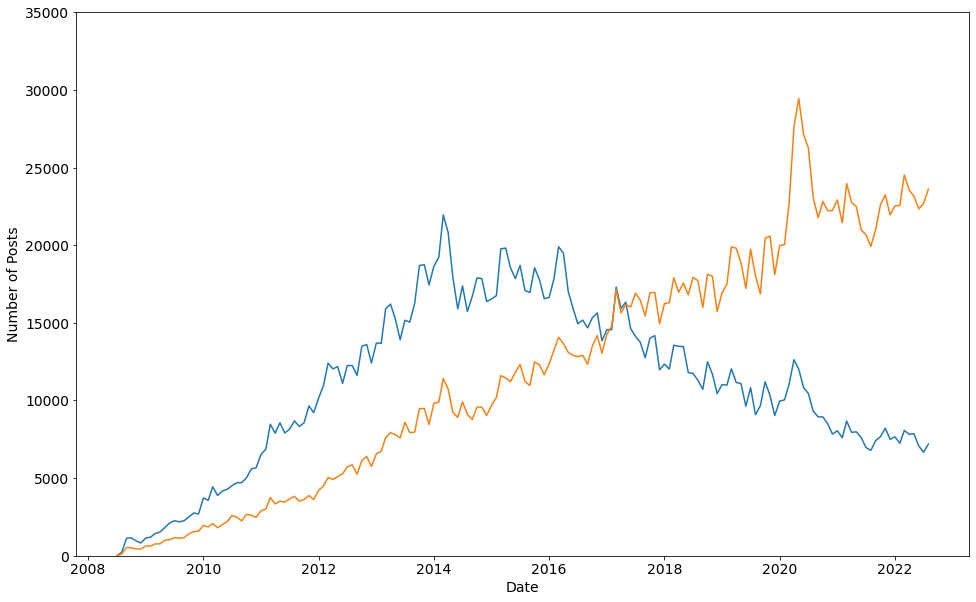

In [13]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java, reshaped_df.python)

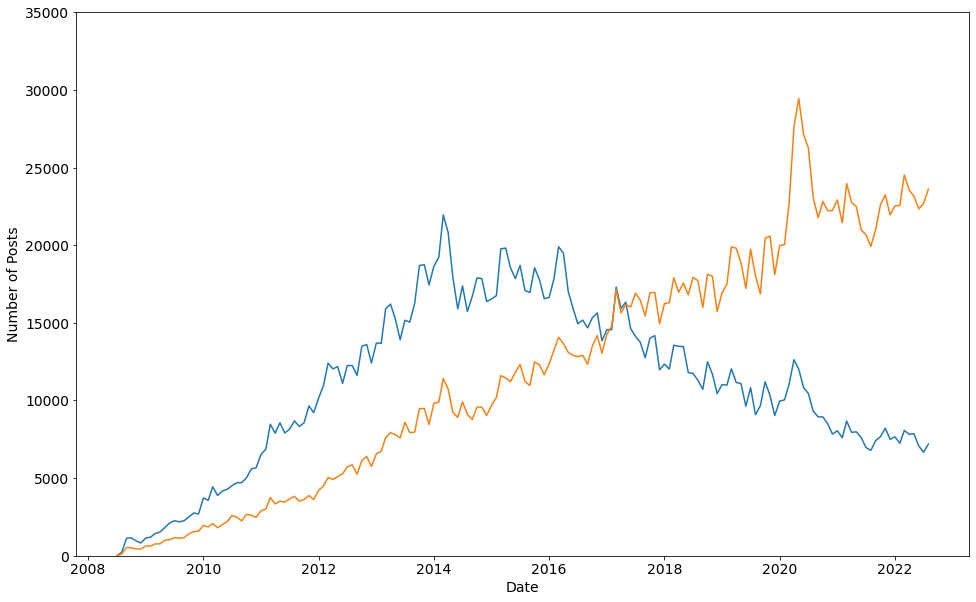

In [14]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

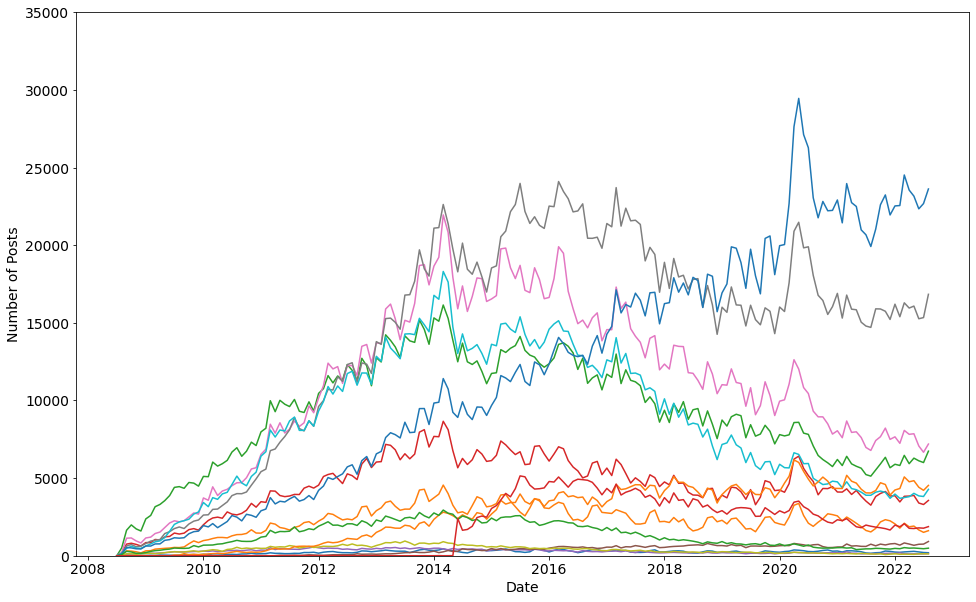

In [15]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

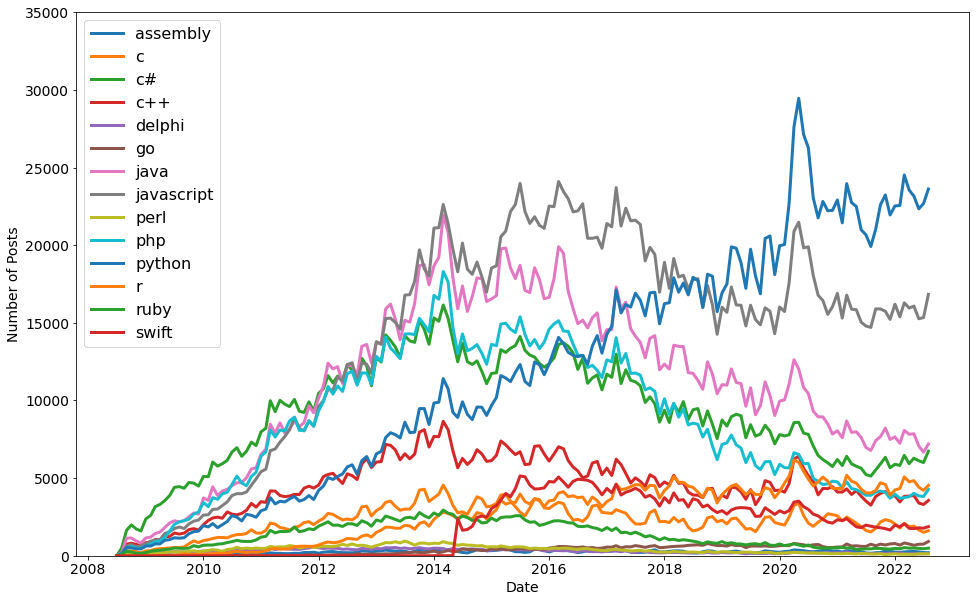

In [16]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)
 
plt.legend(fontsize=16) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

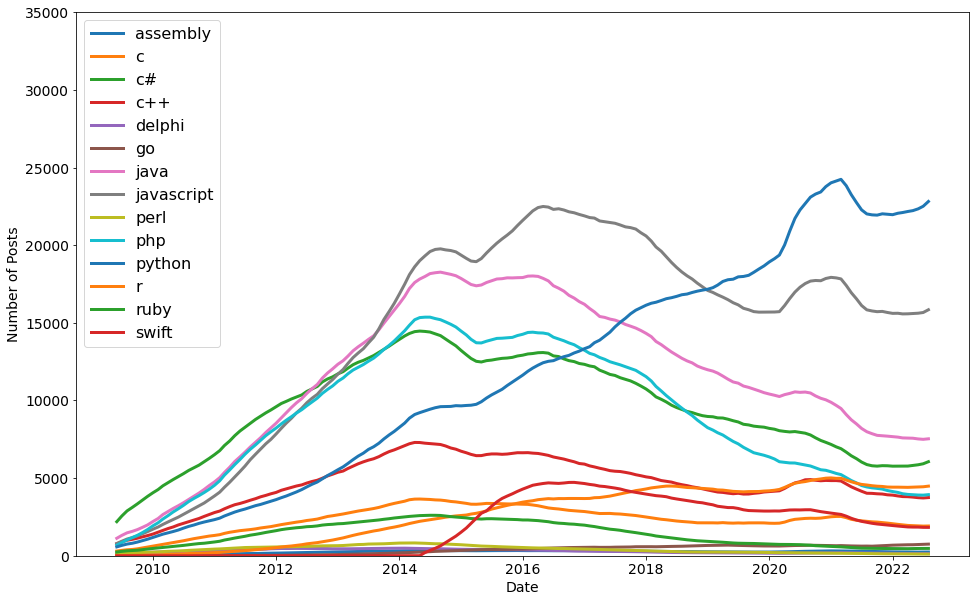

In [20]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=12).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)